In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

## Create data

In [ ]:
# Generate a simple 2D dataset
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Create initial Bayes classifer and kNN classifier with k=5

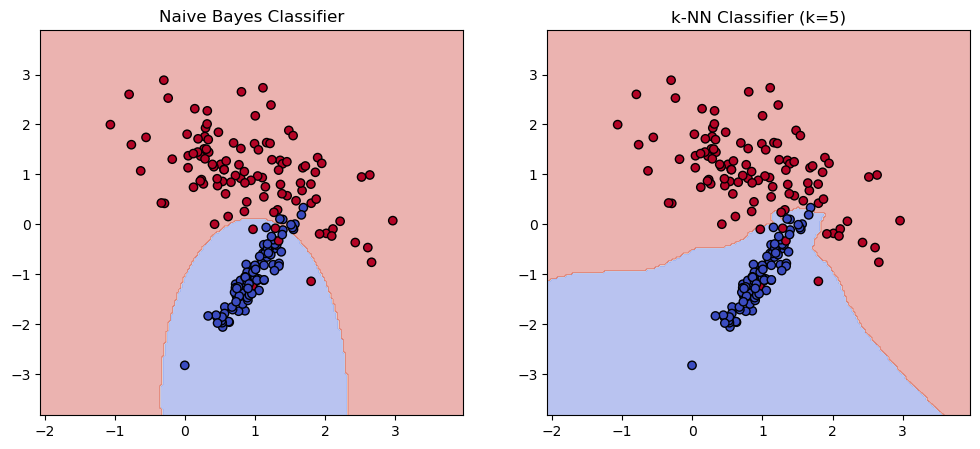

In [3]:
# Train classifiers
nb = GaussianNB()
nb.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Create a grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predictions for each point in the grid
Z_nb = nb.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_knn = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot Naive Bayes
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_nb, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("Naive Bayes Classifier")

# Plot k-NN
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_knn, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("k-NN Classifier (k=5)")

plt.show()


## Plot training data with labels and test data with trained kNN boundary

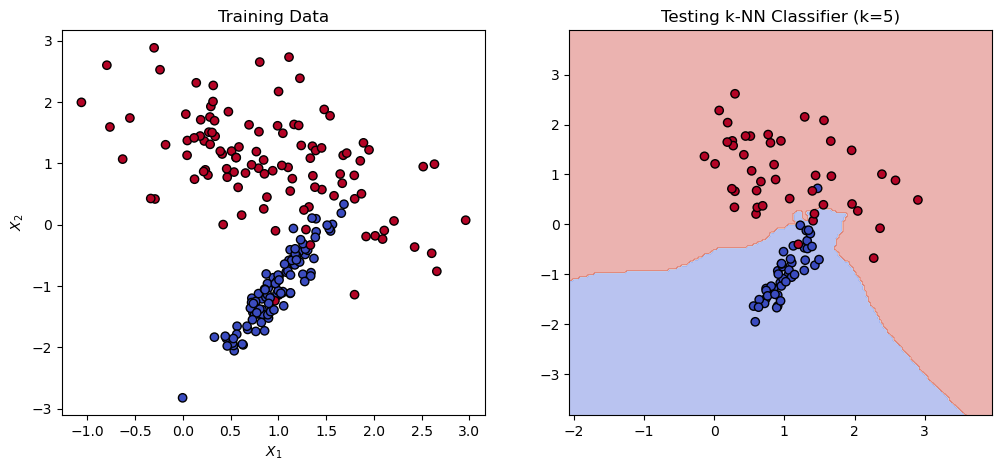

In [4]:
# Plot Naive Bayes
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)

# Plot labeled training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.title("Training Data")

# Plot k-NN on test
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_knn, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("Testing k-NN Classifier (k=5)")

plt.show()

## Create plots for the calculated components of the Bayes classifier

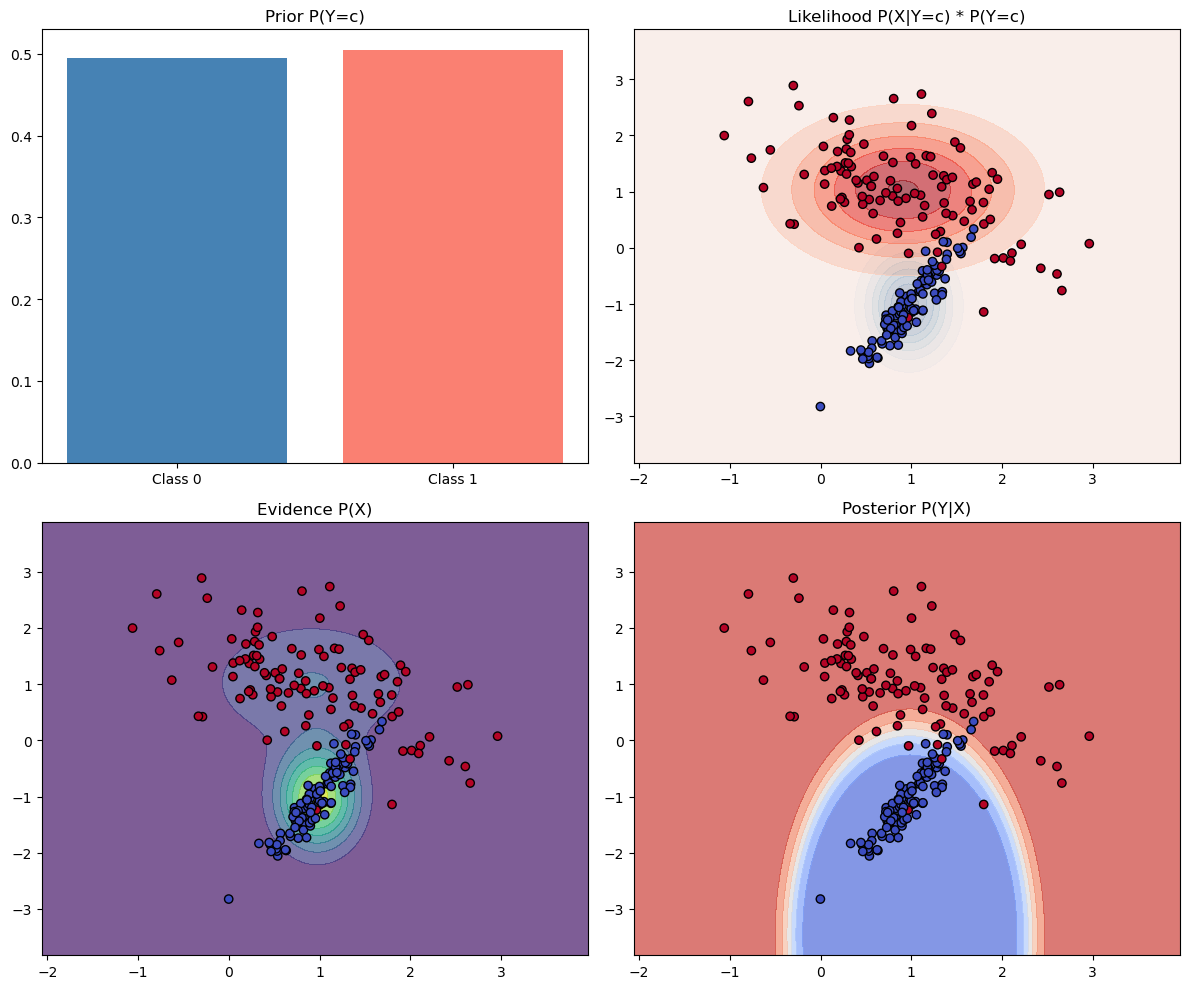

In [ ]:
# Fit Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Create a grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Get Bayes components
priors = nb.class_prior_                           # P(Y=c)
likelihood = np.exp(nb._joint_log_likelihood(grid)) # unnormalized P(X|Y)*P(Y)
evidence = likelihood.sum(axis=1)                  # P(X)
posterior = (likelihood.T / evidence).T            # P(Y|X)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Priors (bar chart, since they’re constants)
axes[0,0].bar([0, 1], priors, tick_label=["Class 0", "Class 1"], color=["steelblue", "salmon"])
axes[0,0].set_title("Prior P(Y=c)")

# 2. Likelihood (for each class)
axes[0,1].contourf(xx, yy, likelihood[:, 0].reshape(xx.shape), cmap="Blues", alpha=0.6)
axes[0,1].contourf(xx, yy, likelihood[:, 1].reshape(xx.shape), cmap="Reds", alpha=0.6)
axes[0,1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", edgecolor="k")
axes[0,1].set_title("Likelihood P(X|Y=c) * P(Y=c)")

# 3. Evidence (normalizer P(X))
axes[1,0].contourf(xx, yy, evidence.reshape(xx.shape), cmap="viridis", alpha=0.7)
axes[1,0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", edgecolor="k")
axes[1,0].set_title("Evidence P(X)")

# 4. Posterior (decision regions)
Z = posterior[:, 1].reshape(xx.shape)  # probability of class 1
axes[1,1].contourf(xx, yy, Z, cmap="coolwarm", alpha=0.7)
axes[1,1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", edgecolor="k")
axes[1,1].set_title("Posterior P(Y|X)")

plt.tight_layout()
plt.show()


## Create plots comparing different choices of k in kNN

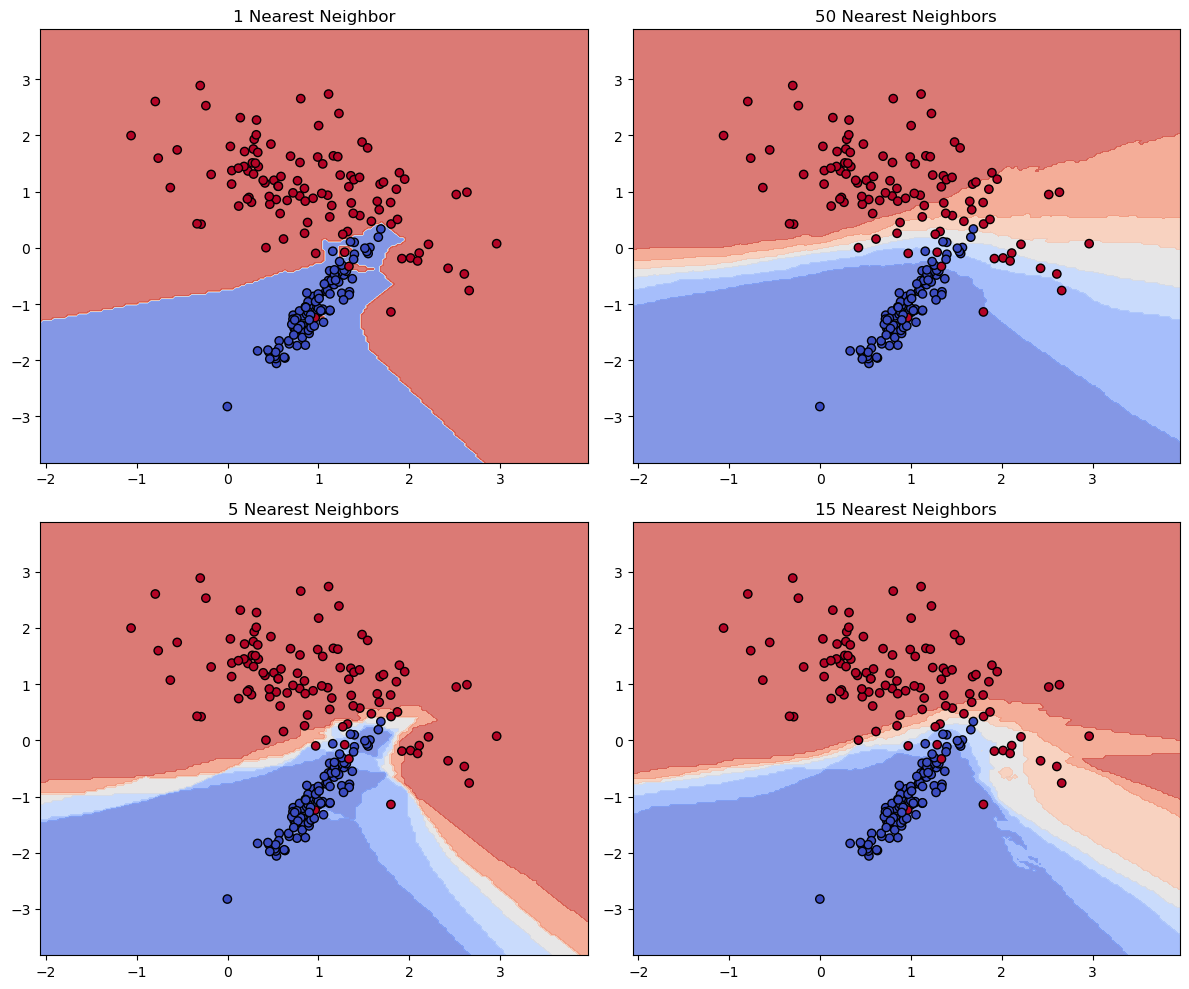

In [6]:
# Fit k-NN
knn05 = KNeighborsClassifier(n_neighbors=5)
knn05.fit(X_train, y_train)

knn15 = KNeighborsClassifier(n_neighbors=15)
knn15.fit(X_train, y_train)

knn01 = KNeighborsClassifier(n_neighbors=1)
knn01.fit(X_train, y_train)

knn50 = KNeighborsClassifier(n_neighbors=50)
knn50.fit(X_train, y_train)


# Create grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predictions: posterior estimates
posterior_knn05 = knn05.predict_proba(grid)
posterior_knn15 = knn15.predict_proba(grid)
posterior_knn01 = knn01.predict_proba(grid)
posterior_knn50 = knn50.predict_proba(grid)


# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Too few neighbors used
Z01 = posterior_knn01[:, 1].reshape(xx.shape)  # prob of class 1
axes[0, 0].contourf(xx, yy, Z01, cmap="coolwarm", alpha=0.7)
axes[0, 0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", edgecolor="k")
axes[0, 0].set_title("1 Nearest Neighbor")

# 2. Two many neighbors used
Z50 = posterior_knn50[:, 1].reshape(xx.shape)  # prob of class 1
axes[0, 1].contourf(xx, yy, Z50, cmap="coolwarm", alpha=0.7)
axes[0, 1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", edgecolor="k")
axes[0, 1].set_title("50 Nearest Neighbors")

# 3. More reasonable amount
Z05 = posterior_knn05[:, 1].reshape(xx.shape)  # prob of class 1
axes[1, 0].contourf(xx, yy, Z05, cmap="coolwarm", alpha=0.7)
axes[1, 0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", edgecolor="k")
axes[1, 0].set_title("5 Nearest Neighbors")

# 4. More reasonable amount
Z15 = posterior_knn15[:, 1].reshape(xx.shape)  # prob of class 1
axes[1, 1].contourf(xx, yy, Z15, cmap="coolwarm", alpha=0.7)
axes[1, 1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", edgecolor="k")
axes[1, 1].set_title("15 Nearest Neighbors")

plt.tight_layout()
plt.show()
